In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import random
from tqdm import trange
import pickle 
import shap
import optuna
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, WhiteKernel, DotProduct, Matern
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
target_list = ['strength', 'modulus', 'elongation']
x_dim = 9
bounds = np.array([[0.8, 75., 1., 100., 1., 130., 1., 150., 1.],
                   [1.6, 100., 5., 130., 5., 150., 5., 170, 5.]])
df = pd.read_csv('../data/data_6.csv')
df = df.sample(frac=1, random_state=42)

X = np.array(df[['ratio', 'T1', 't1', 'T2', 't2', 'T3', 't3', 'T4', 't4']])
Y_total = np.array(df[target_list])

# GPR

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


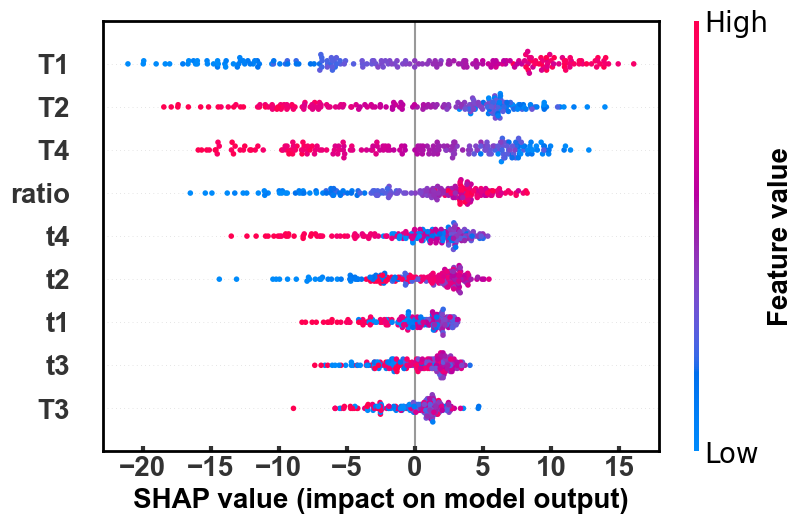

In [29]:
# 不要归一化Y
target = 'strength'
X_train = (X-bounds[0]) /(bounds[1]-bounds[0])
# Y_total_std = (Y_total - Y_total.mean(axis=0)) / Y_total.std(axis=0)
y_train = Y_total[:,target_list.index(target)]

kernel =  Matern()
model = GaussianProcessRegressor(kernel=kernel, random_state=42).fit(X_train, y_train)

# model.predict(X_train, return_std=True)

test_x = np.random.rand(200,9)
explainer = shap.KernelExplainer(model.predict, test_x)
shap_values = explainer.shap_values(test_x)
# shap.summary_plot(shap_values, test_x)

strength_dict = {'data': test_x, 'model': model,'explainer':explainer, 'shap_values':shap_values}
# 可视化结果
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
# plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内

font = {'family': 'Arial',
        'weight': 'bold',
        'size': 20}
fig, ax = plt.subplots()
x_name = ['ratio', 'T1', 't1', 'T2', 't2', 'T3', 't3', 'T4', 't4']
shap.summary_plot(shap_values, test_x, feature_names=x_name, max_display=30, show=False,) #cmap="PiYG_r"
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
for label in ax.get_yticklabels():
    label.set_fontsize(20)
    label.set_weight('bold')
    label.set_fontname("Arial")
    label.set_rotation(0)
for label in ax.get_xticklabels():
    label.set_fontsize(20)
    label.set_weight('bold')
    label.set_fontname("Arial")
ax.tick_params(axis='x', which='major', width=3)

ax.xaxis.get_label().set_fontsize(20)
ax.xaxis.get_label().set_fontweight('bold')
ax.xaxis.get_label().set_fontname("Arial")
plt.gcf().axes[-1].tick_params(labelsize=20)
plt.gcf().axes[-1].set_ylabel("Feature value", fontdict=font)
plt.savefig('%s.png'%target, dpi=800, bbox_inches='tight')
plt.show()

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


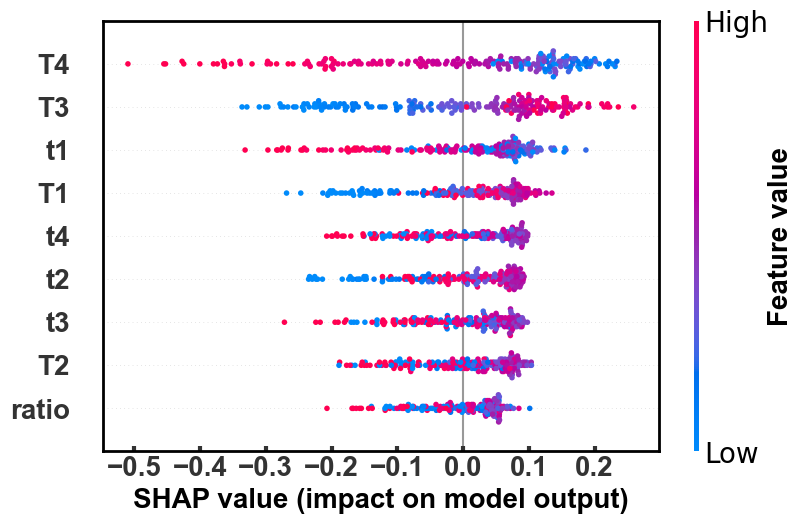

In [30]:
# 不要归一化Y
target = 'modulus'
X_train = (X-bounds[0]) /(bounds[1]-bounds[0])
# Y_total_std = (Y_total - Y_total.mean(axis=0)) / Y_total.std(axis=0)
y_train = Y_total[:,target_list.index(target)]

kernel =  Matern()
model = GaussianProcessRegressor(kernel=kernel, random_state=42).fit(X_train, y_train)

# model.predict(X_train, return_std=True)

test_x = np.random.rand(200,9)
explainer = shap.KernelExplainer(model.predict, test_x)
shap_values = explainer.shap_values(test_x)
# shap.summary_plot(shap_values, test_x)

modulus_dict = {'data': test_x, 'model': model,'explainer':explainer, 'shap_values':shap_values}
# 可视化结果
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
# plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内

font = {'family': 'Arial',
        'weight': 'bold',
        'size': 20}
fig, ax = plt.subplots()
x_name = ['ratio', 'T1', 't1', 'T2', 't2', 'T3', 't3', 'T4', 't4']
shap.summary_plot(shap_values, test_x, feature_names=x_name, max_display=30, show=False,) #cmap="PiYG_r"
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
for label in ax.get_yticklabels():
    label.set_fontsize(20)
    label.set_weight('bold')
    label.set_fontname("Arial")
    label.set_rotation(0)
for label in ax.get_xticklabels():
    label.set_fontsize(20)
    label.set_weight('bold')
    label.set_fontname("Arial")
ax.tick_params(axis='x', which='major', width=3)

ax.xaxis.get_label().set_fontsize(20)
ax.xaxis.get_label().set_fontweight('bold')
ax.xaxis.get_label().set_fontname("Arial")
plt.gcf().axes[-1].tick_params(labelsize=20)
plt.gcf().axes[-1].set_ylabel("Feature value", fontdict=font)
plt.savefig('%s.png'%target, dpi=800, bbox_inches='tight')
plt.show()

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


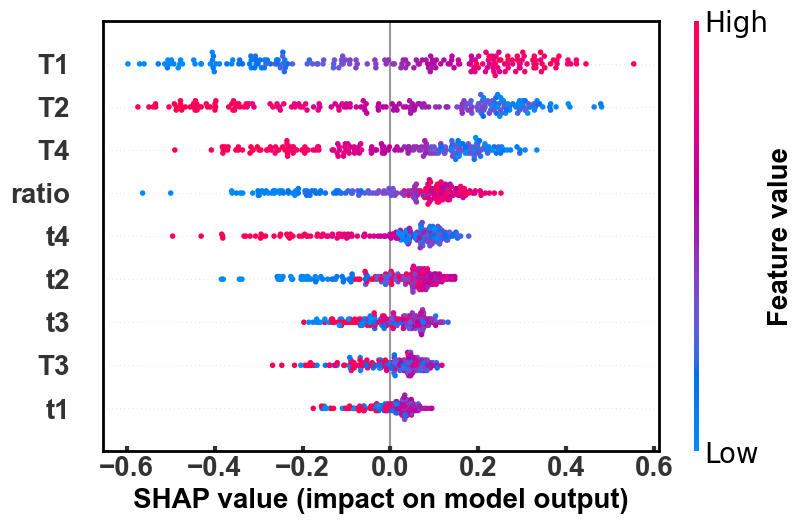

In [31]:
# 不要归一化Y
target = 'elongation'
X_train = (X-bounds[0]) /(bounds[1]-bounds[0])
# Y_total_std = (Y_total - Y_total.mean(axis=0)) / Y_total.std(axis=0)
y_train = Y_total[:,target_list.index(target)]

kernel =  Matern()
model = GaussianProcessRegressor(kernel=kernel, random_state=42).fit(X_train, y_train)

# model.predict(X_train, return_std=True)

test_x = np.random.rand(200,9)
explainer = shap.KernelExplainer(model.predict, test_x)
shap_values = explainer.shap_values(test_x)
# shap.summary_plot(shap_values, test_x)

elongation_dict = {'data': test_x, 'model': model,'explainer':explainer, 'shap_values':shap_values}
# 可视化结果
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
# plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内

font = {'family': 'Arial',
        'weight': 'bold',
        'size': 20}
fig, ax = plt.subplots()
x_name = ['ratio', 'T1', 't1', 'T2', 't2', 'T3', 't3', 'T4', 't4']
shap.summary_plot(shap_values, test_x, feature_names=x_name, max_display=30, show=False,) #cmap="PiYG_r"
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
for label in ax.get_yticklabels():
    label.set_fontsize(20)
    label.set_weight('bold')
    label.set_fontname("Arial")
    label.set_rotation(0)
for label in ax.get_xticklabels():
    label.set_fontsize(20)
    label.set_weight('bold')
    label.set_fontname("Arial")
ax.tick_params(axis='x', which='major', width=3)

ax.xaxis.get_label().set_fontsize(20)
ax.xaxis.get_label().set_fontweight('bold')
ax.xaxis.get_label().set_fontname("Arial")
plt.gcf().axes[-1].tick_params(labelsize=20)
plt.gcf().axes[-1].set_ylabel("Feature value", fontdict=font)
plt.savefig('%s.png'%target, dpi=800, bbox_inches='tight')
plt.show()

In [32]:
state_dict = {
    'strength': strength_dict,
    'modulus':modulus_dict,
    'elongation':elongation_dict,
}
with open('shap_states_0923.pth', 'wb') as f:
    pickle.dump(state_dict, f)

In [3]:
# # 0313
# with open('shap_states_1229.pth', 'rb') as f:
#     state_dict = pickle.load(f)
# for target in ['strength', 'modulus', 'elongation','tg']:

#     test_x = state_dict[target]['data']
#     shap_values = state_dict[target]['shap_values']
#     # 可视化结果
#     plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
#     # plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内

#     font = {'family': 'Arial',
#             'weight': 'bold',
#             'size': 20}
#     fig, ax = plt.subplots()
#     x_name = ['T.1', 't.1', 'T.2', 't.2', 'T.3', 't.3']
#     shap.summary_plot(shap_values, test_x, feature_names=x_name, max_display=30, show=False,) #cmap="PiYG_r"
#     for spine in ax.spines.values():
#         spine.set_visible(True)
#         spine.set_edgecolor('black')
#         spine.set_linewidth(2)
#     for label in ax.get_yticklabels():
#         label.set_fontsize(20)
#         label.set_weight('bold')
#         label.set_fontname("Arial")
#         label.set_rotation(0)
#     for label in ax.get_xticklabels():
#         label.set_fontsize(20)
#         label.set_weight('bold')
#         label.set_fontname("Arial")
#     ax.tick_params(axis='x', which='major', width=3)

#     ax.xaxis.get_label().set_fontsize(20)
#     ax.xaxis.get_label().set_fontweight('bold')
#     ax.xaxis.get_label().set_fontname("Arial")
#     plt.gcf().axes[-1].tick_params(labelsize=20)
#     plt.gcf().axes[-1].set_ylabel("Feature value", fontdict=font)
#     plt.gcf().set_size_inches(6, 4)
#     plt.savefig('shap_figure/0313_%s.png'%target, dpi=800, bbox_inches='tight')
#     plt.show()

# hotmap

In [36]:
tmp = [1.6, 99, 4.333, 103, 2.75, 140, 152]
lists = []
for i in np.arange(1., 5.1, 0.1):
    for j in np.arange(1., 5.1, 0.1):
        lists.append(tmp + [i,j])
        
df = pd.DataFrame()
df[['ratio', 'T1', 't1', 'T2', 't2', 'T3', 'T4', 't3', 't4']] = lists
df.to_csv('test_pre.csv', index=False)

In [43]:
df = pd.read_csv('test_pre.csv')
bounds = np.array([[0.8, 75., 1., 100., 1., 130., 1., 150., 1.],
                   [1.6, 100., 5., 130., 5., 150., 5., 170, 5.]])
X = np.array(df[['ratio', 'T1', 't1', 'T2', 't2', 'T3', 't3', 'T4', 't4']])
X_train = (X-bounds[0]) /(bounds[1]-bounds[0])

with open('shap_states_0923.pth', 'rb') as f:
    state_dict = pickle.load(f)


In [49]:
for target in ['strength', 'modulus', 'elongation']:
    model = state_dict[target]['model']
    # model.predict(X_train, return_std=True)
    df[target] = state_dict[target]['model'].predict(X_train)

In [51]:
df.to_csv('test_pre.csv', index=False)

In [58]:
df = pd.read_csv('test_pre.csv')
df[['strength_', 'modulus_', 'elongation_']] = (df[['strength', 'modulus', 'elongation']] - df[['strength', 'modulus', 'elongation']].mean())/df[['strength', 'modulus', 'elongation']].std()

In [60]:
df['sum'] = df[['strength_', 'modulus_', 'elongation_']].sum(axis=1)

In [62]:
df.to_csv('test_pre.csv', index=False)

In [63]:
df

,ratio,T1,t1,T2,t2,T3,T4,t3,t4,strength,modulus,elongation,strength_,modulus_,elongation_,sum
0,1.6,99.0,4.333,103.0,2.75,140.0,152.0,1.0,1.0,106.881372,5.172166,2.652639,-0.292618,0.396050,-0.516239,-0.412807
1,1.6,99.0,4.333,103.0,2.75,140.0,152.0,1.0,1.1,108.303252,5.199836,2.676003,-0.205023,0.506992,-0.480248,-0.178278
2,1.6,99.0,4.333,103.0,2.75,140.0,152.0,1.0,1.2,109.636236,5.226126,2.695821,-0.122904,0.612404,-0.449718,0.039782
3,1.6,99.0,4.333,103.0,2.75,140.0,152.0,1.0,1.3,110.872793,5.250949,2.711943,-0.046725,0.711930,-0.424883,0.240322
4,1.6,99.0,4.333,103.0,2.75,140.0,152.0,1.0,1.4,112.005143,5.274207,2.724242,0.023034,0.805182,-0.405937,0.422280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1.6,99.0,4.333,103.0,2.75,140.0,152.0,5.0,4.6,76.244372,4.505232,1.856864,-2.180021,-2.278004,-1.742105,-6.200131
1677,1.6,99.0,4.333,103.0,2.75,140.0,152.0,5.0,4.7,74.611326,4.479591,1.804557,-2.280626,-2.380809,-1.822683,-6.484117
1678,1.6,99.0,4.333,103.0,2.75,140.0,152.0,5.0,4.8,72.965924,4.452826,1.752742,-2.381991,-2.488122,-1.902501,-6.772615
1679,1.6,99.0,4.333,103.0,2.75,140.0,152.0,5.0,4.9,71.311622,4.424991,1.701487,-2.483905,-2.599727,-1.981459,-7.065091
